In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 随机生成1000个点，围绕在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

# 生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()




/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<Figure size 640x480 with 1 Axes>

In [3]:
# 生成1维的W矩阵，取值是[-1,1]之间的随机数
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
# 生成1维的b矩阵，初始值是0
b = tf.Variable(tf.zeros([1]), name='b')
# 经过计算得出预估值y
y = W * x_data + b

# 以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data), name='loss')
# 采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train = optimizer.minimize(loss, name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

# 初始化的W和b是多少
print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# 执行20次训练
for step in range(20):
    sess.run(train)
    # 输出训练好的W和b
    print ("W =", sess.run(W), "b =", sess.run(b), "loss =", sess.run(loss))
# writer = tf.train.SummaryWriter("./tmp", sess.graph)
writer=tf.summary.FileWriter('./tmp',sess.graph)

W = [0.7599578] b = [0.] loss = 0.23133221
W = [0.5511658] b = [0.3088967] loss = 0.063876964
W = [0.41118914] b = [0.30636513] loss = 0.03078132
W = [0.3148055] b = [0.30466795] loss = 0.015090025
W = [0.24843924] b = [0.3034993] loss = 0.0076504718
W = [0.20274183] b = [0.30269465] loss = 0.004123231
W = [0.17127627] b = [0.3021406] loss = 0.0024508964
W = [0.14961022] b = [0.30175906] loss = 0.0016580096
W = [0.13469177] b = [0.3014964] loss = 0.0012820862
W = [0.12441948] b = [0.3013155] loss = 0.0011038538
W = [0.11734635] b = [0.30119094] loss = 0.0010193501
W = [0.11247605] b = [0.30110517] loss = 0.0009792853
W = [0.10912254] b = [0.30104613] loss = 0.00096028985
W = [0.10681343] b = [0.30100548] loss = 0.00095128367
W = [0.10522347] b = [0.30097747] loss = 0.00094701373
W = [0.10412867] b = [0.3009582] loss = 0.0009449891
W = [0.10337484] b = [0.30094492] loss = 0.0009440292
W = [0.10285578] b = [0.30093578] loss = 0.00094357436
W = [0.10249837] b = [0.3009295] loss = 0.000943

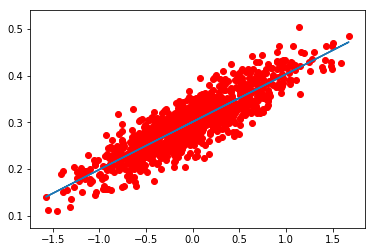

In [4]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(W)*x_data+sess.run(b))
plt.show()

In [5]:
import sys
print (sys.path)

['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/home/fay/.local/lib/python3.5/site-packages', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/home/fay/.ipython']
